# Executive Summary:

Yulu, India's leading micro-mobility service provider, has been experiencing a decline in revenues. To understand the factors influencing the demand for shared electric cycles in the Indian market, the company initiated a comprehensive analysis. The key objectives were to identify significant variables predicting demand and assess how well these variables describe electric cycle demand.




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
df = pd.read_csv("bike_sharing.csv")

# Exploratory Data Analysis

In [ ]:
df.shape

(10886, 12)

In [ ]:
# 14 columns or features and 10886 rows or records

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#function to categorize seasons with season names
def season_fn(x):
  if x == 1:
    return "spring"
  elif x == 2:
    return "summer"
  elif x == 3:
    return "fall"
  else:
    return "winter"
df["season_name"] = df["season"].apply(season_fn)

In [ ]:
#function to categorize weather conditions with names
def weather_fn(x):
  if x == 1:
    return "clear"
  elif x == 2:
    return "Foggy"
  elif x == 3:
    return "light drizzle"
  else:
    return "heavy drizzle"

df["weather_condition"] = df["weather"].apply(weather_fn)

In [ ]:
#function to categorize holidays

def holiday_fn(x):
  if x == 1:
    return "Y"
  else:
    return "N"

df["holiday_indicator"] = df["holiday"].apply(holiday_fn)


#function to categorize woking days

def workingday_fn(x):
  if x == 1:
    return "Y"
  else:
    return "N"

df["workingday_indicator"] = df["workingday"].apply(workingday_fn)


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,weather_condition,holiday_indicator,workingday_indicator
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,clear,N,N
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,clear,N,N
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,clear,N,N
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,clear,N,N
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,clear,N,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              10886 non-null  object 
 1   season                10886 non-null  int64  
 2   holiday               10886 non-null  int64  
 3   workingday            10886 non-null  int64  
 4   weather               10886 non-null  int64  
 5   temp                  10886 non-null  float64
 6   atemp                 10886 non-null  float64
 7   humidity              10886 non-null  int64  
 8   windspeed             10886 non-null  float64
 9   casual                10886 non-null  int64  
 10  registered            10886 non-null  int64  
 11  count                 10886 non-null  int64  
 12  season_name           10886 non-null  object 
 13  weather_condition     10886 non-null  object 
 14  holiday_indicator     10886 non-null  object 
 15  workingday_indicato

In [ ]:
# no null values and need to change datetime to datetime data type

In [ ]:
#changing datatype of datetime column from object to datetime data type
df["datetime"] = pd.to_datetime(df["datetime"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              10886 non-null  datetime64[ns]
 1   season                10886 non-null  int64         
 2   holiday               10886 non-null  int64         
 3   workingday            10886 non-null  int64         
 4   weather               10886 non-null  int64         
 5   temp                  10886 non-null  float64       
 6   atemp                 10886 non-null  float64       
 7   humidity              10886 non-null  int64         
 8   windspeed             10886 non-null  float64       
 9   casual                10886 non-null  int64         
 10  registered            10886 non-null  int64         
 11  count                 10886 non-null  int64         
 12  season_name           10886 non-null  object        
 13  weather_conditio

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
season_name,10886,4,winter,2734
weather_condition,10886,4,clear,7192
holiday_indicator,10886,2,N,10575
workingday_indicator,10886,2,Y,7412


* Mean casual users = 36 and std = 49.9
* Mean registered users = 155.5 and std = 151
* Mean of count of total rental bikes = 191.5 = 36 + 155.5 and std = 181.1

In [ ]:
#Univariate analysis

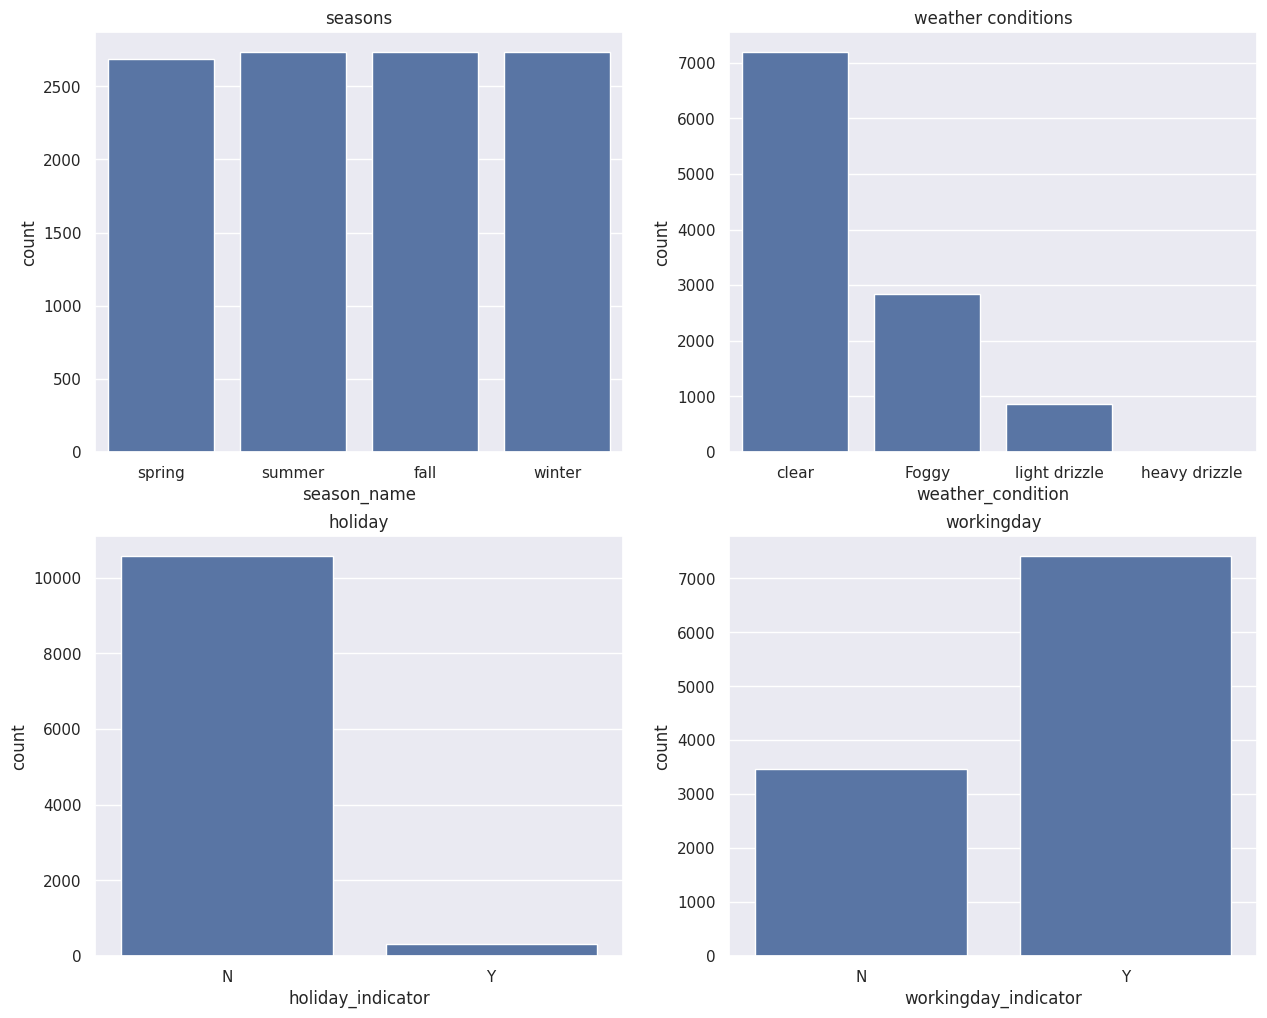

In [ ]:
#seasons
fig = plt.figure(figsize = [15,12])
plt.subplot(2,2,1)
plt.title("seasons")
sns.countplot(data = df, x = "season_name")

#weather
plt.subplot(2,2,2)
plt.title("weather conditions")
sns.countplot(data = df, x = "weather_condition")

#holidays
plt.subplot(2,2,3)
plt.title("holiday")
sns.countplot(data = df, x = "holiday_indicator")

#workingdays
plt.subplot(2,2,4)
plt.title("workingday")
sns.countplot(data = df, x = "workingday_indicator")

plt.show()

Percentage of records availabe in the dataframe for each categor

In [ ]:
df["season_name"].value_counts(normalize = "True")*100

winter    25.114826
summer    25.105640
fall      25.105640
spring    24.673893
Name: season_name, dtype: float64

In [ ]:
df["weather_condition"].value_counts(normalize = "True")*100

clear            66.066507
Foggy            26.033437
light drizzle     7.890869
heavy drizzle     0.009186
Name: weather_condition, dtype: float64

In [ ]:
df["holiday_indicator"].value_counts(normalize = "True")*100

N    97.14312
Y     2.85688
Name: holiday_indicator, dtype: float64

only 2.8% of the total days are holidays

In [ ]:
df["workingday_indicator"].value_counts(normalize = "True")*100

Y    68.087452
N    31.912548
Name: workingday_indicator, dtype: float64

In [ ]:
pd.crosstab(df["holiday_indicator"], df["workingday_indicator"], normalize = True)*100

workingday_indicator,N,Y
holiday_indicator,,
N,29.055668,68.087452
Y,2.856880,0.000000


* 29% are weekends(not a holiday and not a working day)
* working day = 68%
* holidays = 2.8%

In [ ]:
df.loc[df["weather_condition"]== "heavy drizzle"]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,weather_condition,holiday_indicator,workingday_indicator
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,spring,heavy drizzle,N,Y


only one heavy drizzle day, and registered users on tht day were higher than casual users and it was a working day

<Axes: title={'center': 'Boxplot of total rentals'}, xlabel='count'>

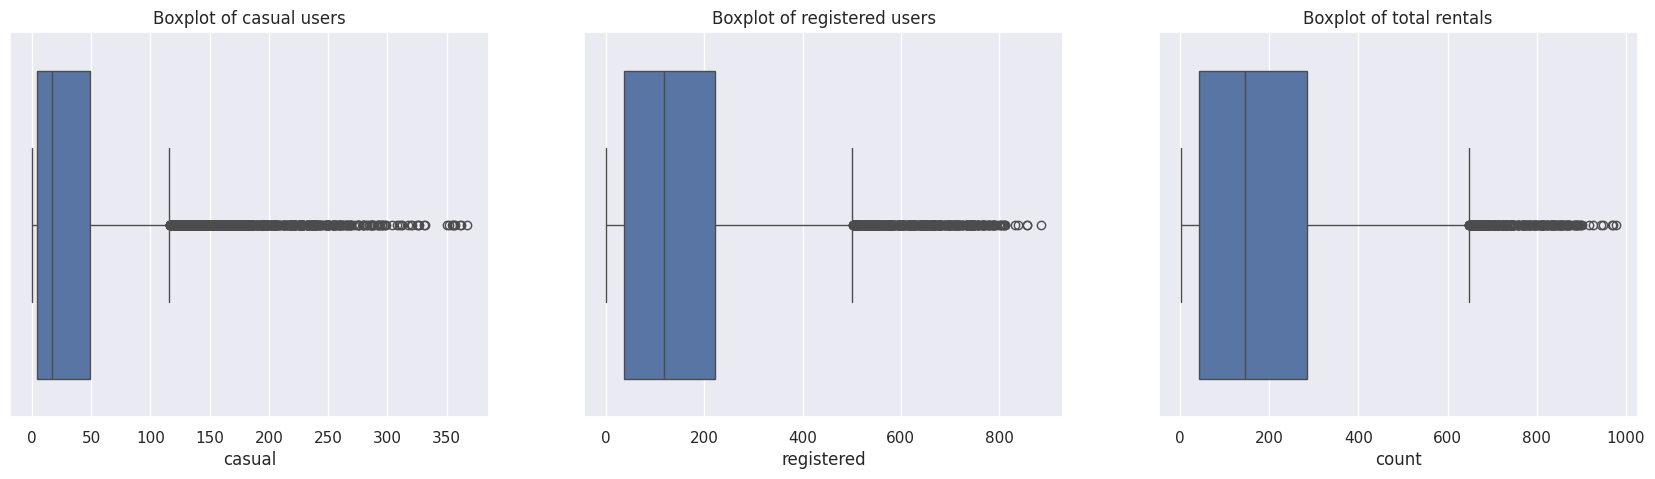

In [ ]:
#outliers analysis:
fig = plt.figure(figsize = [21,5])
plt.subplot(1,3,1)
plt.title("Boxplot of casual users")
sns.boxplot(data = df, x = "casual")

plt.subplot(1,3,2)
plt.title("Boxplot of registered users")
sns.boxplot(data = df, x = "registered")

plt.subplot(1,3,3)
plt.title("Boxplot of total rentals")
sns.boxplot(data = df, x = "count")

In [ ]:
#outliers in casual users
df.loc[df["casual"]>120].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,2.663352,0.066761,0.075284,1.234375,27.220739,31.140270,47.072443,14.058541,185.954545,292.160511,478.115057
std,0.842686,0.249786,0.264037,0.477559,5.353028,5.493773,14.952238,8.025507,52.620498,102.909307,123.891579
min,1.000000,0.000000,0.000000,1.000000,13.940000,12.120000,16.000000,0.000000,121.000000,96.000000,238.000000
25%,2.000000,0.000000,0.000000,1.000000,23.780000,27.275000,36.000000,8.998100,143.000000,227.750000,382.000000
50%,3.000000,0.000000,0.000000,1.000000,27.880000,31.820000,45.000000,12.998000,175.000000,276.500000,459.000000
75%,3.000000,0.000000,0.000000,1.000000,31.160000,34.850000,57.000000,19.001200,220.000000,342.000000,555.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,43.940000,89.000000,56.996900,367.000000,802.000000,970.000000


In [ ]:
#outliers in casual users
df.loc[df["casual"]>120].describe(include = "object").T

,count,unique,top,freq
season_name,704,4,fall,275
weather_condition,704,3,clear,556
holiday_indicator,704,2,N,657
workingday_indicator,704,2,N,651


casual users rent the most on weekends(non working days and non holidays)

In [ ]:
#outliers in registered users
df.loc[df["registered"]>500].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,2.808962,0.009434,0.988208,1.299528,24.487830,28.146462,55.073113,13.913008,63.044811,631.018868,694.063679
std,0.927038,0.096784,0.108078,0.534750,6.562673,7.027970,17.296246,7.892347,36.968716,88.517283,105.904450
min,1.000000,0.000000,0.000000,1.000000,8.200000,10.605000,17.000000,0.000000,3.000000,501.000000,513.000000
25%,2.000000,0.000000,1.000000,1.000000,20.500000,23.485000,41.000000,8.998100,30.000000,550.500000,604.000000
50%,3.000000,0.000000,1.000000,1.000000,25.420000,30.305000,54.000000,12.998000,60.500000,625.000000,678.000000
75%,4.000000,0.000000,1.000000,2.000000,29.520000,33.335000,66.000000,19.001200,91.000000,697.250000,776.250000
max,4.000000,1.000000,1.000000,3.000000,37.720000,42.425000,100.000000,43.998900,247.000000,886.000000,977.000000


In [ ]:
#outliers in registered users
df.loc[df["registered"]>500].describe(include = "object").T

,count,unique,top,freq
season_name,424,4,fall,147
weather_condition,424,3,clear,313
holiday_indicator,424,2,N,420
workingday_indicator,424,2,Y,419


registered users rent the most on working days

In [ ]:
#outliers in total rentals
df.loc[df["count"]>650].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,295.00000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2.79661,0.006780,0.837288,1.274576,26.242780,29.997593,51.861017,13.688418,108.454237,644.396610,752.850847
std,0.85276,0.082199,0.369730,0.510966,5.421364,5.887796,17.035907,7.826637,85.500788,122.319318,77.032625
min,1.00000,0.000000,0.000000,1.000000,9.020000,10.605000,17.000000,0.000000,10.000000,316.000000,651.000000
25%,2.00000,0.000000,1.000000,1.000000,22.960000,26.515000,37.000000,8.998100,48.000000,617.500000,684.000000
50%,3.00000,0.000000,1.000000,1.000000,27.060000,31.060000,51.000000,12.998000,90.000000,665.000000,734.000000
75%,3.00000,0.000000,1.000000,1.000000,29.520000,33.335000,65.000000,19.001200,117.000000,730.000000,812.500000
max,4.00000,1.000000,1.000000,3.000000,37.720000,42.425000,94.000000,39.000700,367.000000,886.000000,977.000000


In [ ]:
#outliers in total rentals
df.loc[df["count"]>650].describe(include = "object").T

,count,unique,top,freq
season_name,295,4,fall,114
weather_condition,295,3,clear,223
holiday_indicator,295,2,N,293
workingday_indicator,295,2,Y,247


outliers in rentals(casual + registered) happen on working days, where weather condition is clear

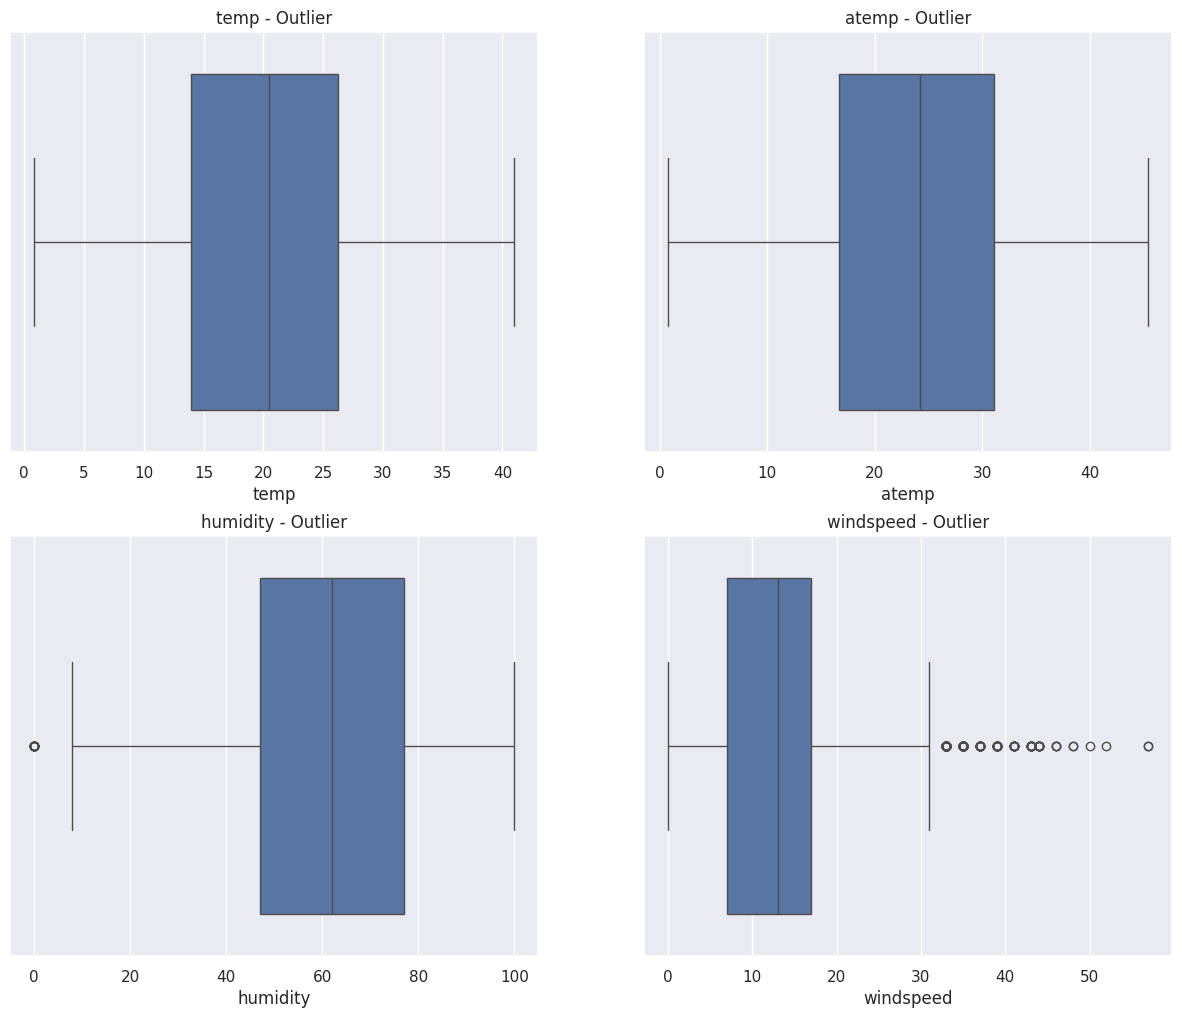

In [ ]:
#outliers(environmental conditions)
fig = plt.figure(figsize=[15, 12])
plt.subplot(2, 2, 1)
plt.title('temp - Outlier')
sns.boxplot(data=df, x='temp')
plt.subplot(2, 2, 2)
plt.title('atemp - Outlier')
sns.boxplot(data=df, x='atemp')
plt.subplot(2, 2, 3)
plt.title('humidity - Outlier')
sns.boxplot(data=df, x='humidity')
plt.subplot(2, 2, 4)
plt.title('windspeed - Outlier')
sns.boxplot(data=df, x='windspeed')
plt.show()

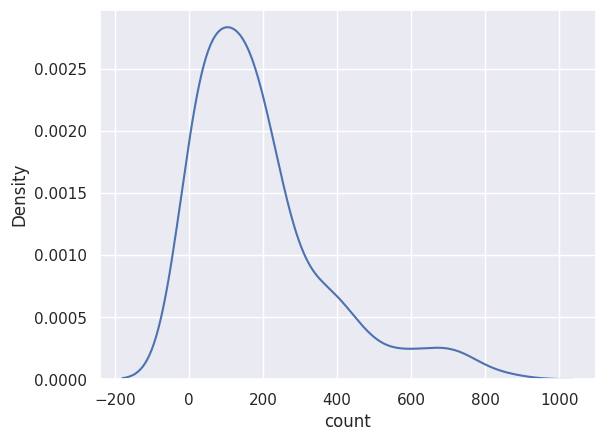

In [ ]:
#outlier distribution w.r.t windspeed
sns.kdeplot(data = df.loc[df["windspeed"]> 32], x = "count")
plt.show()

In [ ]:
#outlier distribution w.r.t windspeed
df.loc[df["windspeed"]> 32, "count"].describe()

count    227.000000
mean     192.339207
std      178.364061
min        1.000000
25%       60.500000
50%      151.000000
75%      245.000000
max      857.000000
Name: count, dtype: float64

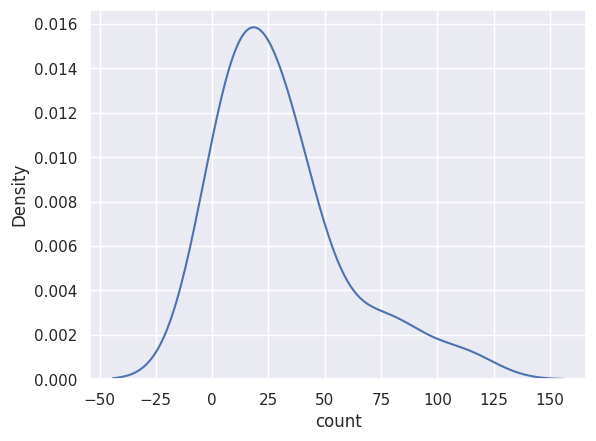

In [ ]:
#outlier distribution w.r.t humidity
sns.kdeplot(data = df.loc[df["humidity"]< 10], x = "count")
plt.show()

In [ ]:
#outlier distribution w.r.t humidity
df.loc[df["humidity"]< 10, "count"].describe()

count     23.000000
mean      30.434783
std       28.169658
min        1.000000
25%       12.000000
50%       24.000000
75%       37.500000
max      111.000000
Name: count, dtype: float64

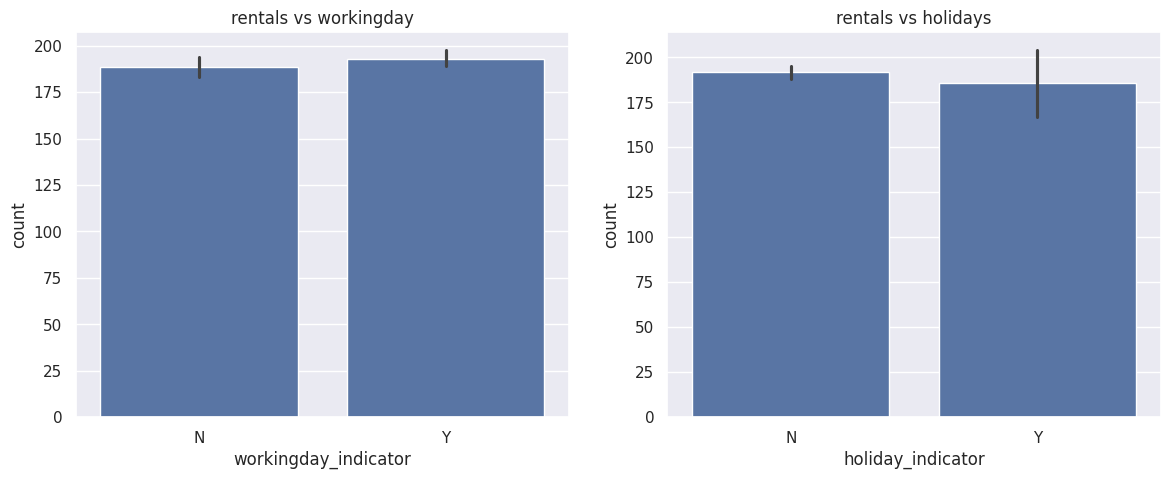

In [ ]:
#Total rentals on workings and holidays
fig = plt.figure(figsize = [14,5])
plt.subplot(1,2,1)
plt.title("rentals vs workingday")
sns.barplot(data = df, x = "workingday_indicator", y = "count")

plt.subplot(1,2,2)
plt.title("rentals vs holidays")
sns.barplot(data = df, x = "holiday_indicator", y = "count")
plt.show()

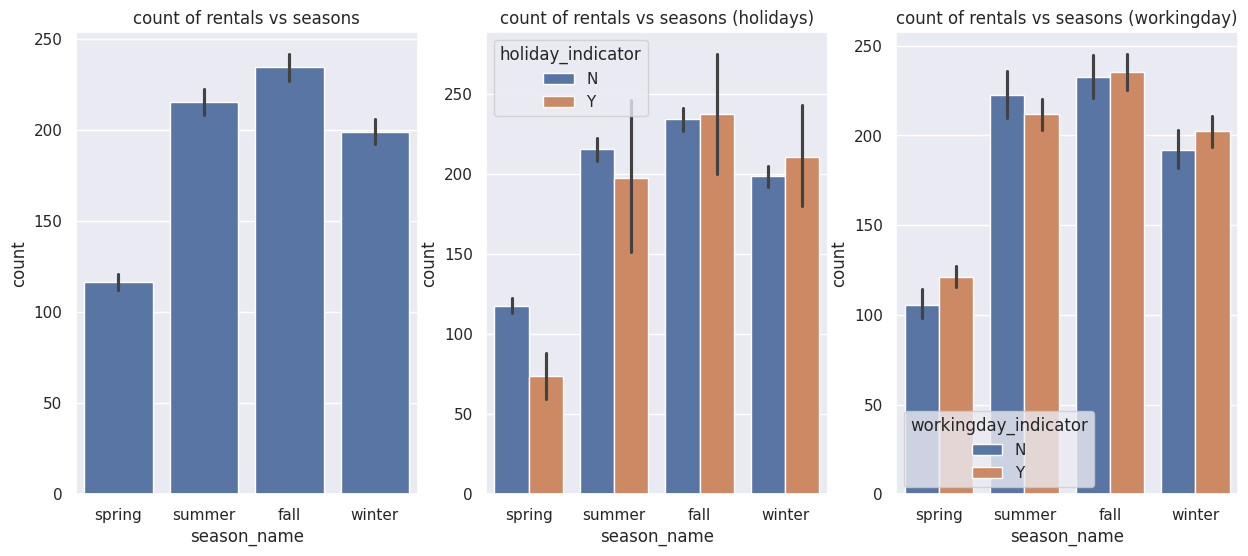

In [ ]:
#total rentals on different seasons

fig = plt.figure(figsize=[15, 6])

# First subplot
plt.subplot(1, 3, 1)
plt.title("count of rentals vs seasons")
sns.barplot(data=df, x="season_name", y="count")

# Second subplot
plt.subplot(1, 3, 2)
sns.barplot(data=df, x="season_name", y="count", hue="holiday_indicator")
plt.title("count of rentals vs seasons (holidays)")

# Third subplot
plt.subplot(1, 3, 3)
sns.barplot(data=df, x="season_name", y="count", hue="workingday_indicator")
plt.title("count of rentals vs seasons (workingday)")

# Show all subplots
plt.show()


* fall, summer and winter saw the high number of bike rentals(cascual plus registered)
* In fall and winter rentals on holidays is slighty greater than on non holidays
* fall, summer and winter saw the high number of bike rentals(cascual plus registered)
* only in summer, the number of rentals on non working day exceeds working days

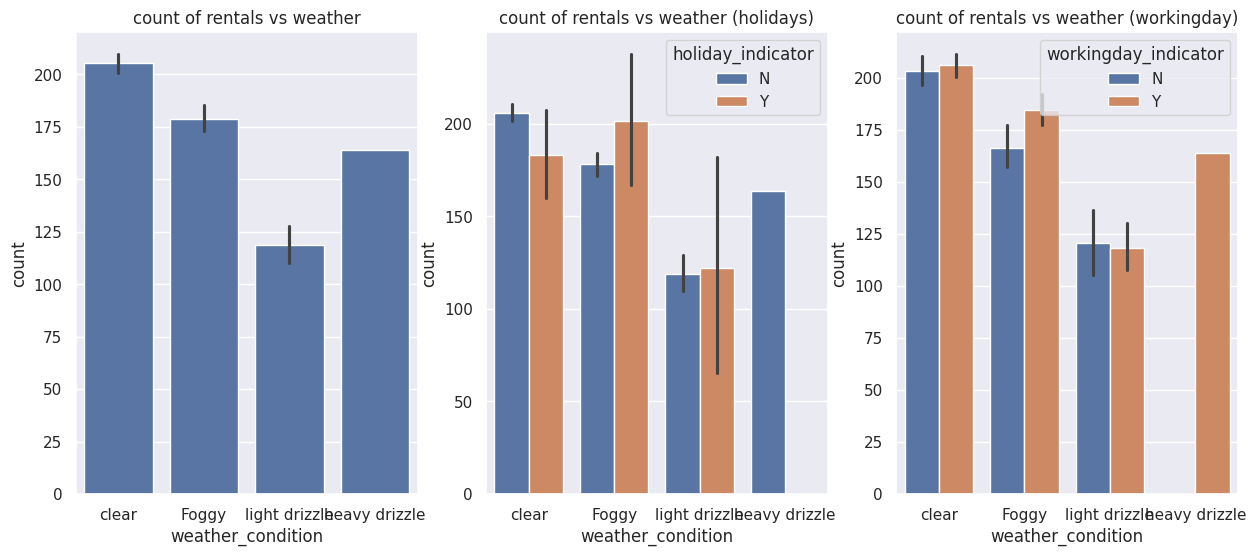

In [ ]:
#total rentals on different weather conditions

fig = plt.figure(figsize=[15, 6])

# First subplot
plt.subplot(1, 3, 1)
sns.barplot(data=df, x="weather_condition", y="count")
plt.title("count of rentals vs weather")

# Second subplot
plt.subplot(1, 3, 2)
sns.barplot(data=df, x="weather_condition", y="count", hue="holiday_indicator")
plt.title("count of rentals vs weather (holidays)")

# Third subplot
plt.subplot(1, 3, 3)
sns.barplot(data=df, x="weather_condition", y="count", hue="workingday_indicator")
plt.title("count of rentals vs weather (workingday)")

# Show all subplots
plt.show()


* clear and foggy weather conditions saw high number of total rentals
* on heavy drizzling days there were no rentals on holidays
* clear and foggy weather conditions saw high number of total rentals
* on heavy drizzling days there are rentals only on working days

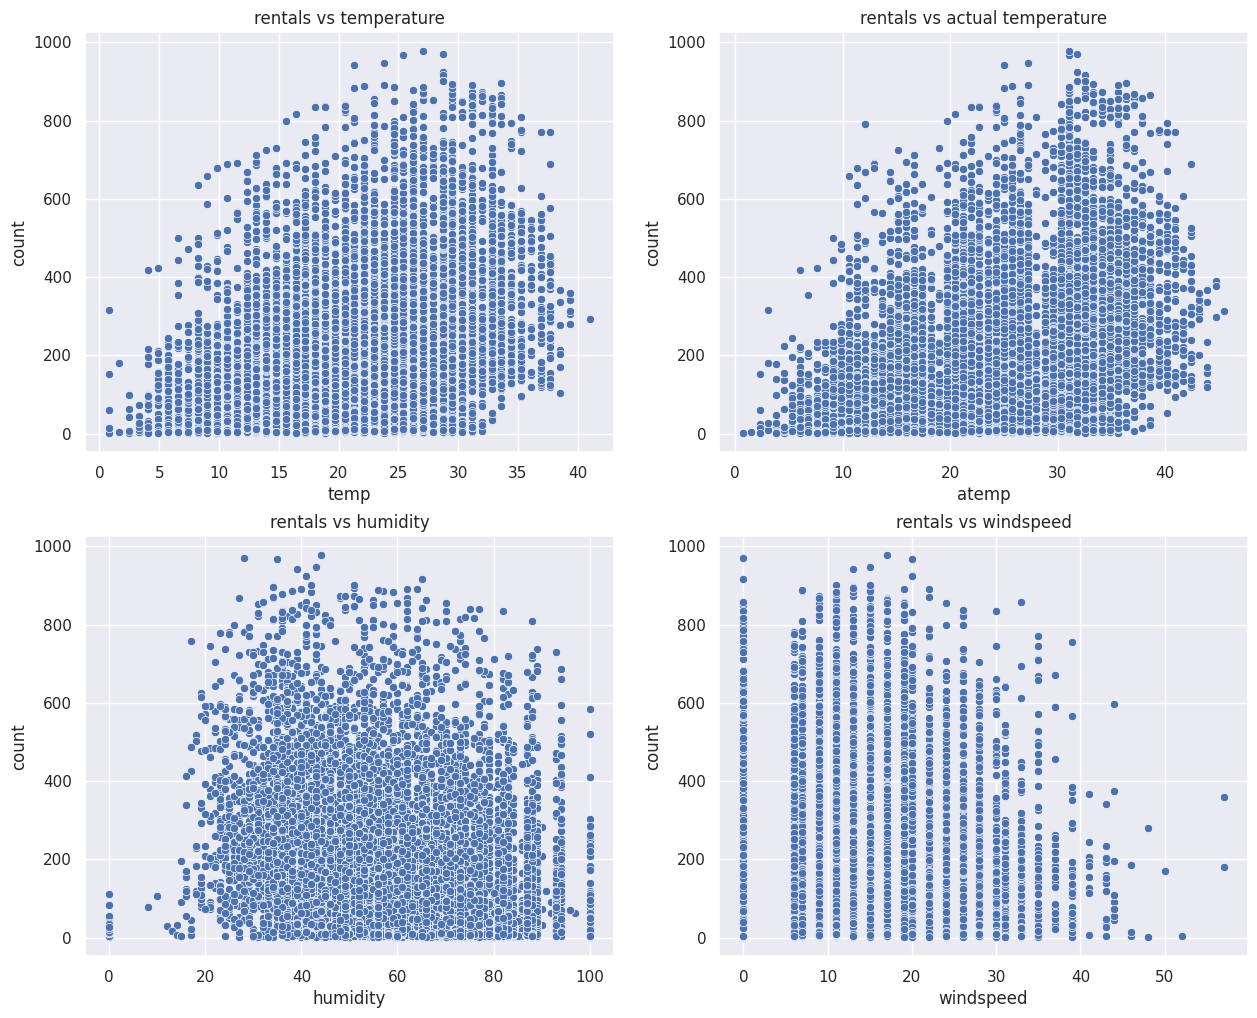

In [ ]:
#total rentals vs weather variables

fig = plt.figure(figsize = [15,12])
plt.subplot(2,2,1)
plt.title("rentals vs temperature")
sns.scatterplot(data = df, x = "temp", y = "count")

plt.subplot(2,2,2)
plt.title("rentals vs actual temperature")
sns.scatterplot(data = df, x = "atemp", y = "count")

plt.subplot(2,2,3)
plt.title("rentals vs humidity")
sns.scatterplot(data = df, x = "humidity", y = "count")

plt.subplot(2,2,4)
plt.title("rentals vs windspeed")
sns.scatterplot(data = df, x = "windspeed", y = "count")

plt.show()

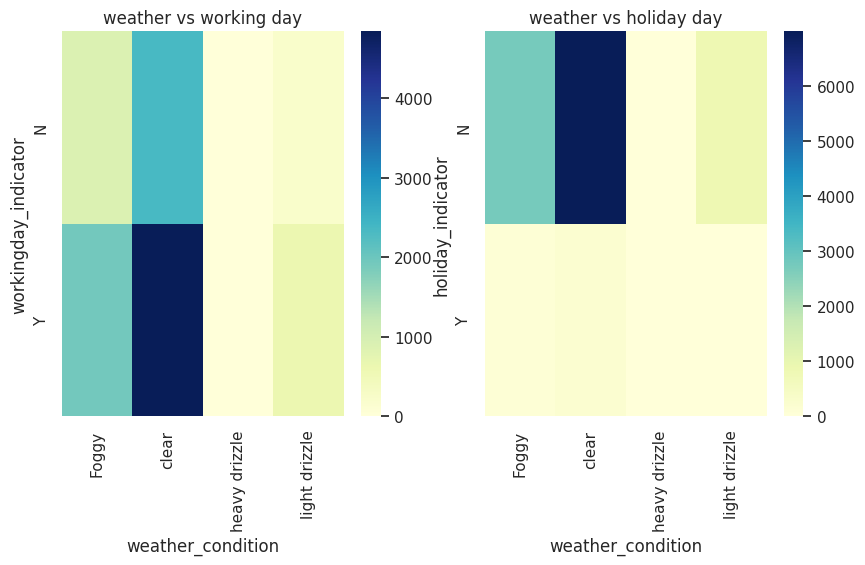

In [ ]:
#weather condition on working days and holidays

fig = plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.title("weather vs working day")
sns.heatmap(data =pd.crosstab(df["workingday_indicator"], df["weather_condition"]),cmap='YlGnBu' )

plt.subplot(1,2,2)
plt.title("weather vs holiday day")
sns.heatmap(data =pd.crosstab(df["holiday_indicator"], df["weather_condition"]),cmap='YlGnBu' )

plt.show()

be it working day or holiday clear day is the most popular rental day

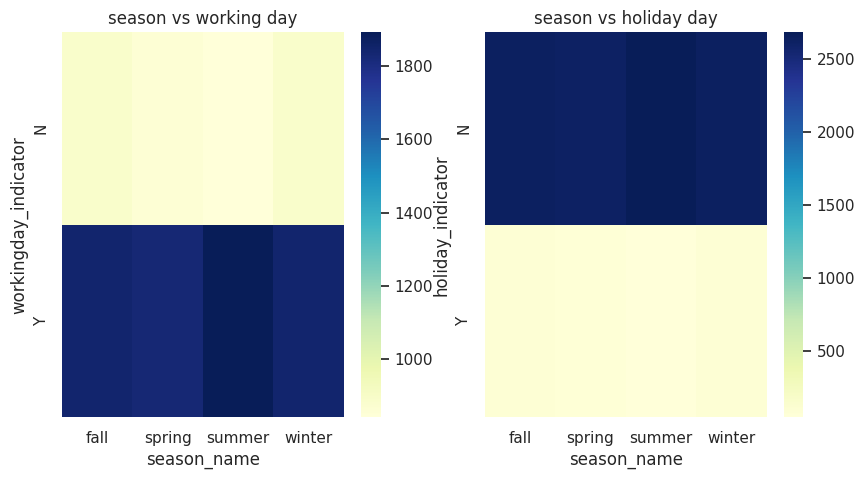

In [ ]:
#seasons vs workingday and holiday

fig = plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.title("season vs working day")
sns.heatmap(data =pd.crosstab(df["workingday_indicator"], df["season_name"]),cmap='YlGnBu' )

plt.subplot(1,2,2)
plt.title("season vs holiday day")
sns.heatmap(data =pd.crosstab(df["holiday_indicator"], df["season_name"]),cmap='YlGnBu' )

plt.show()

 summer, fall and winter are the popular months amoung rental users

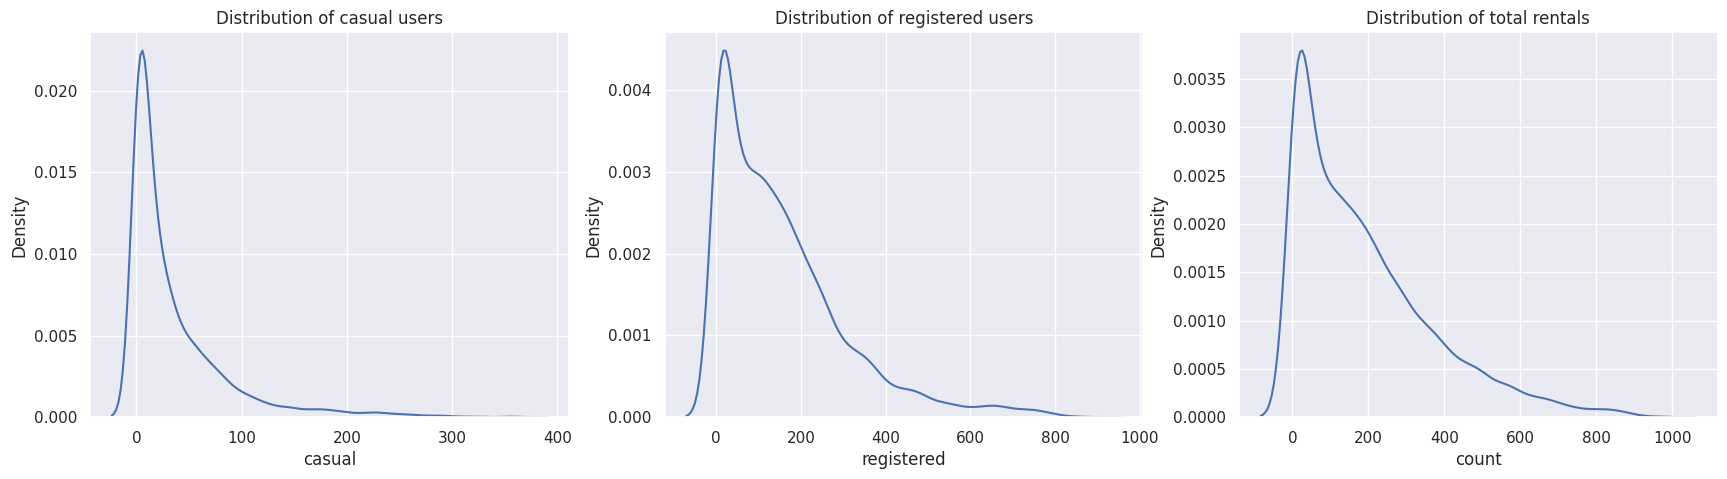

In [ ]:
#Distribution of casual users, registered users and count of total rental bikes
fig = plt.figure(figsize = [21,5])
plt.subplot(1,3,1)
plt.title("Distribution of casual users")
sns.kdeplot(data = df, x = "casual")

plt.subplot(1,3,2)
plt.title("Distribution of registered users")
sns.kdeplot(data = df, x = "registered")

plt.subplot(1,3,3)
plt.title("Distribution of total rentals")
sns.kdeplot(data = df, x = "count")
plt.show()

all are right tailed distributions

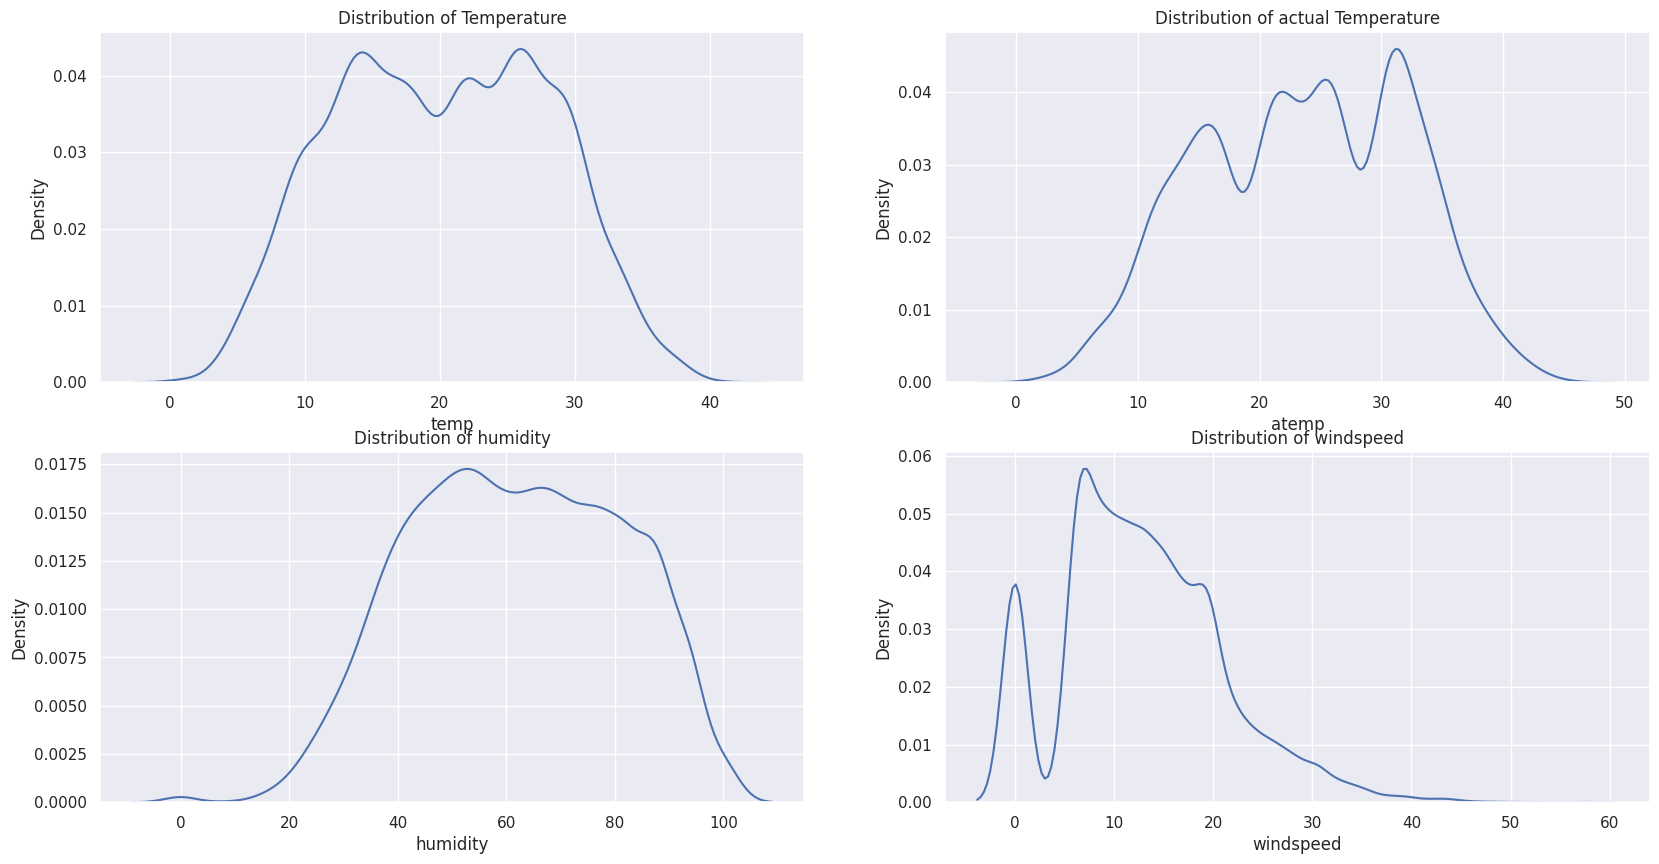

In [ ]:
# distribution of weather variables
fig = plt.figure(figsize = [20,10])
plt.subplot(2,2,1)
plt.title("Distribution of Temperature")
sns.kdeplot(data = df, x = "temp")

plt.subplot(2,2,2)
plt.title("Distribution of actual Temperature")
sns.kdeplot(data = df, x = "atemp")

plt.subplot(2,2,3)
plt.title("Distribution of humidity")
sns.kdeplot(data = df, x = "humidity")

plt.subplot(2,2,4)
plt.title("Distribution of windspeed")
sns.kdeplot(data = df, x = "windspeed")

plt.show()

In [ ]:
#function that generates n samples of size m from a given df

def sample_generator(dfx, n, m):
  #empty list to store sample dfs
  l = []
  for i in range(n):
    l.append(dfx.sample(m))
  return l

In [ ]:
#funtion that generators mean of the samples generated using sample_generator func

def mean_generators(l):
  #empty list
  l2 = []
  for i in range(len(l)):
    l2.append(l[i].mean())
  l2 = np.array(l2)
  return l2

In [ ]:
#function that calculates the mean, standard deviation, confidence interval and distribution graph for scenarios

def func1(dfx,x):
  x_users = sample_generator(dfx[x], 50, 200)
  means_of_x_users = mean_generators(x_users)
  sns.kdeplot(data = means_of_x_users)
  print(f"Mean of {x} users: {round(means_of_x_users.mean(),2)}, Std.deviation: {round(means_of_x_users.std(),2)}")
  print("90% of ",x, " users fall under this numbers: ", norm.interval(0.90, loc = means_of_x_users.mean(), scale = means_of_x_users.std()))

# User Segmentation Statistics Summary

Mean of casual users: 35.71, Std.deviation: 3.66
90% of  casual  users fall under this numbers:  (29.688957375514583, 41.74064262448541)

Mean of registered users: 153.93, Std.deviation: 10.69
90% of  registered  users fall under this numbers:  (136.35448889149973, 171.5073111085003)

Mean of count users: 190.17, Std.deviation: 12.67
90% of  count  users fall under this numbers:  (169.32661705402236, 211.02018294597767)


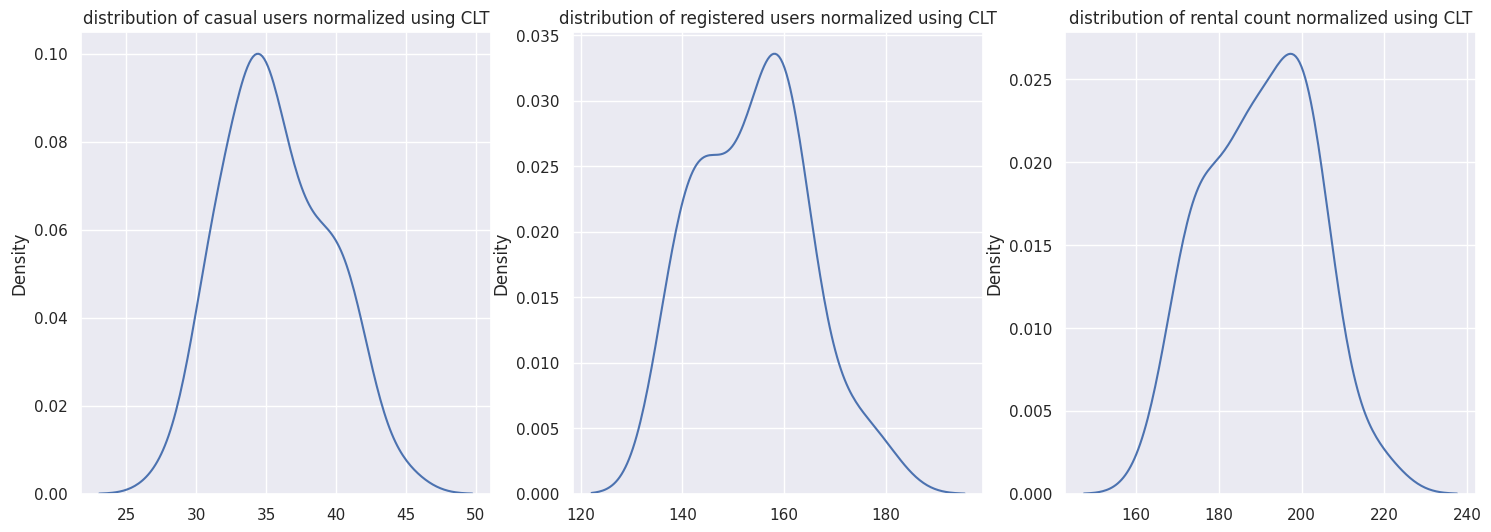

In [ ]:
# distribution of casual, registered and total rentals normalized using CLT(Central Limit Theorem)
fig = plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
plt.title("distribution of casual users normalized using CLT")
func1(df,"casual")
print()

plt.subplot(1,3,2)
plt.title("distribution of registered users normalized using CLT")
func1(df,"registered")
print()

plt.subplot(1,3,3)
plt.title("distribution of rental count normalized using CLT")
func1(df,"count")

In [ ]:
df_working = df.loc[df["workingday_indicator"]== "Y"]

Mean of casual users: 25.34, Std.deviation: 2.0
90% of  casual  users fall under this numbers:  (22.044768079628874, 28.625231920371128)

Mean of registered users: 166.34, Std.deviation: 11.46
90% of  registered  users fall under this numbers:  (147.48167987866566, 185.19272012133428)

Mean of count users: 193.12, Std.deviation: 11.49
90% of  count  users fall under this numbers:  (174.2308036108964, 212.01819638910362)


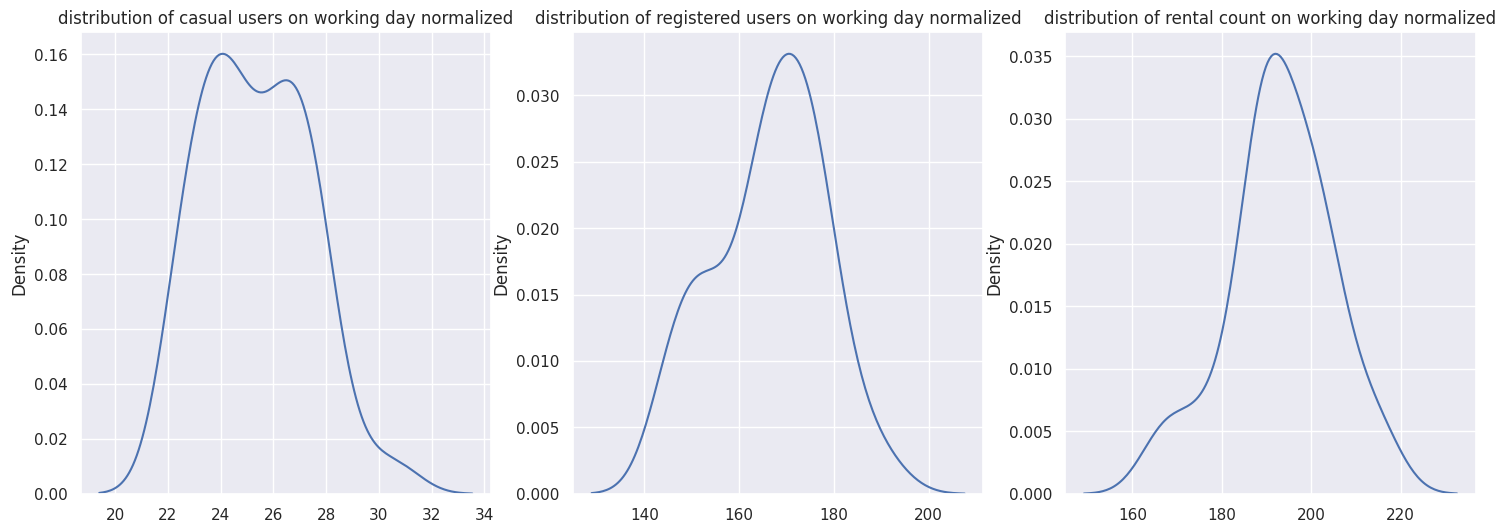

In [ ]:
#  distribution of casual, registered and total rentals on a workingday normalized using CLT(Central Limit Theorem)
fig = plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
plt.title("distribution of casual users on working day normalized")
func1(df_working,"casual")
print()

plt.subplot(1,3,2)
plt.title("distribution of registered users on working day normalized")
func1(df_working, "registered")
print()

plt.subplot(1,3,3)
plt.title("distribution of rental count on working day normalized")
func1(df_working, "count")

In [ ]:
df_nonworking = df.loc[df["workingday_indicator"]== "N"]

Mean of casual users: 59.85, Std.deviation: 4.67
90% of  casual  users fall under this numbers:  (52.17006569960747, 67.53373430039254)

Mean of registered users: 129.94, Std.deviation: 6.53
90% of  registered  users fall under this numbers:  (119.20527808943142, 140.6843219105686)

Mean of count users: 186.83, Std.deviation: 12.89
90% of  count  users fall under this numbers:  (165.62756058847384, 208.03823941152615)


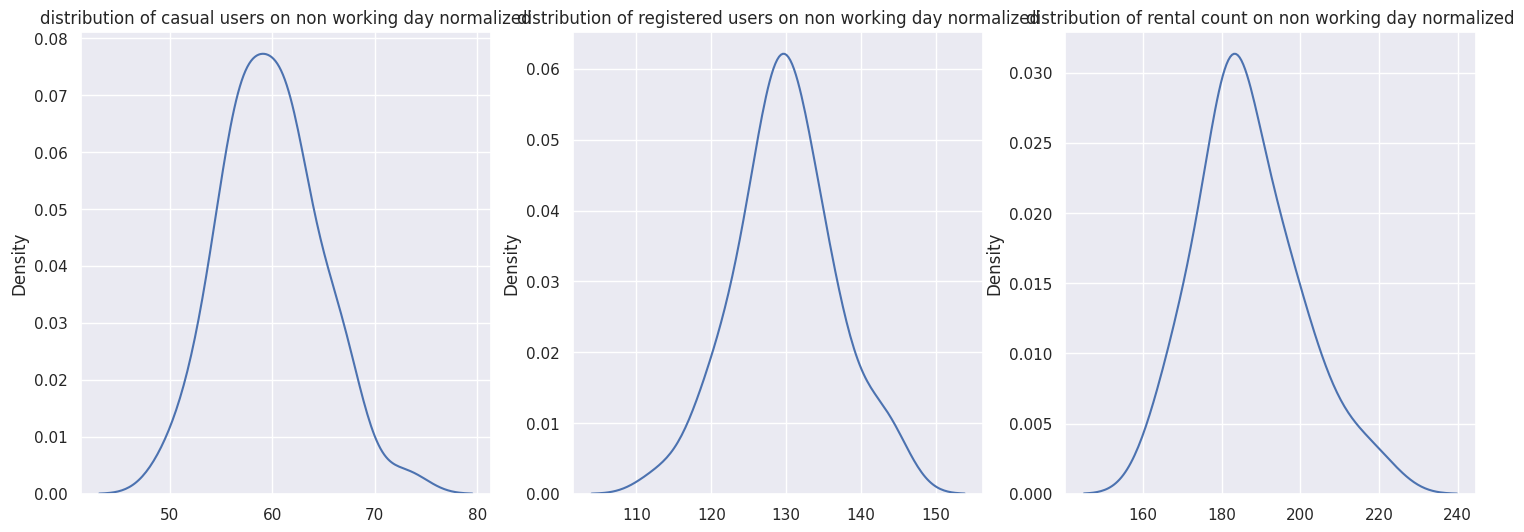

In [ ]:
# distribution of casual, registered and total rentals on a non workingday normalized using CLT(Central Limit Theorem)
fig = plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
plt.title("distribution of casual users on non working day normalized")
func1(df_nonworking,"casual")
print()

plt.subplot(1,3,2)
plt.title("distribution of registered users on non working day normalized")
func1(df_nonworking, "registered")
print()

plt.subplot(1,3,3)
plt.title("distribution of rental count on non working day normalized")
func1(df_nonworking, "count")

In [ ]:
#df on holidays
df_holidays = df.loc[df["holiday_indicator"]=="Y"]

Mean of casual users: 48.75, Std.deviation: 2.65
90% of  casual  users fall under this numbers:  (44.386828498719154, 53.11077150128085)

Mean of registered users: 137.52, Std.deviation: 4.71
90% of  registered  users fall under this numbers:  (129.78067990801654, 145.26612009198348)

Mean of count users: 185.88, Std.deviation: 7.85
90% of  count  users fall under this numbers:  (172.96631256624954, 198.78848743375056)


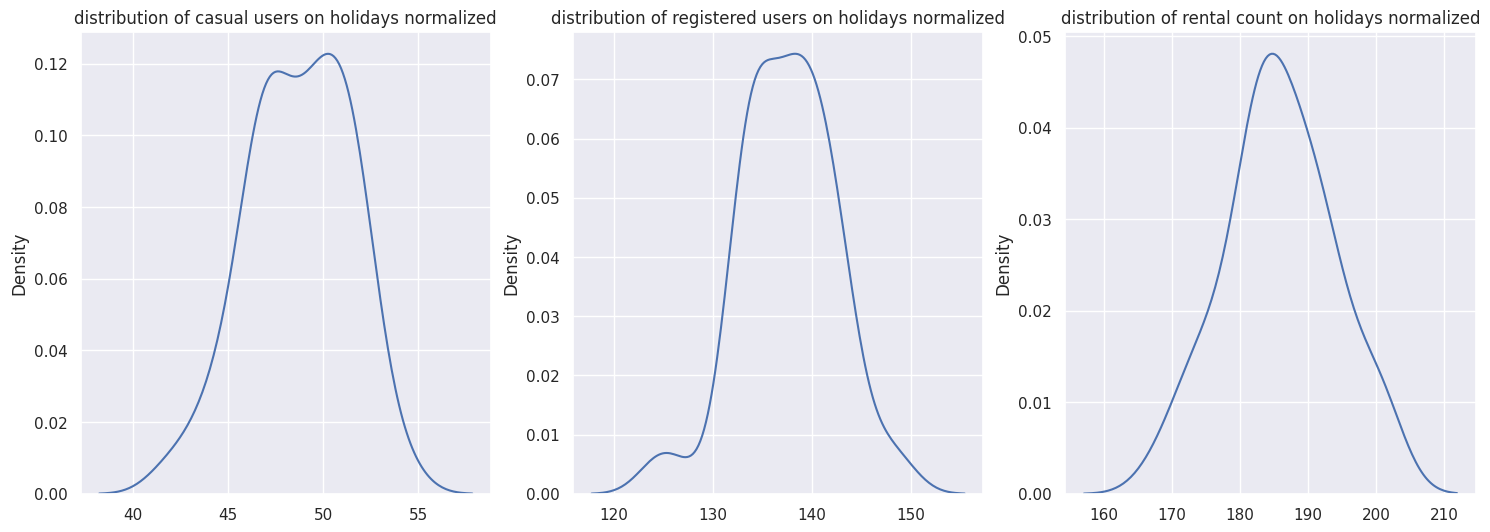

In [ ]:
#  distribution of casual, registered and total rentals on holidays normalized using CLT(Central Limit Theorem)
fig = plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
plt.title("distribution of casual users on holidays normalized")
func1(df_holidays, "casual")
print()

plt.subplot(1,3,2)
plt.title("distribution of registered users on holidays normalized")
func1(df_holidays, "registered")
print()

plt.subplot(1,3,3)
plt.title("distribution of rental count on holidays normalized")
func1(df_holidays, "count")

In [ ]:
#df on weekends
df_weekends = df.loc[(df["holiday_indicator"]== "N")&(df["workingday_indicator"]=="N")]

Mean of casual users: 60.45, Std.deviation: 4.41
90% of  casual  users fall under this numbers:  (53.20398787490683, 67.69981212509316)

Mean of registered users: 127.5, Std.deviation: 7.42
90% of  registered  users fall under this numbers:  (115.29618369558845, 139.6980163044115)

Mean of count users: 189.4, Std.deviation: 8.74
90% of  count  users fall under this numbers:  (175.0273740701283, 203.76322592987168)


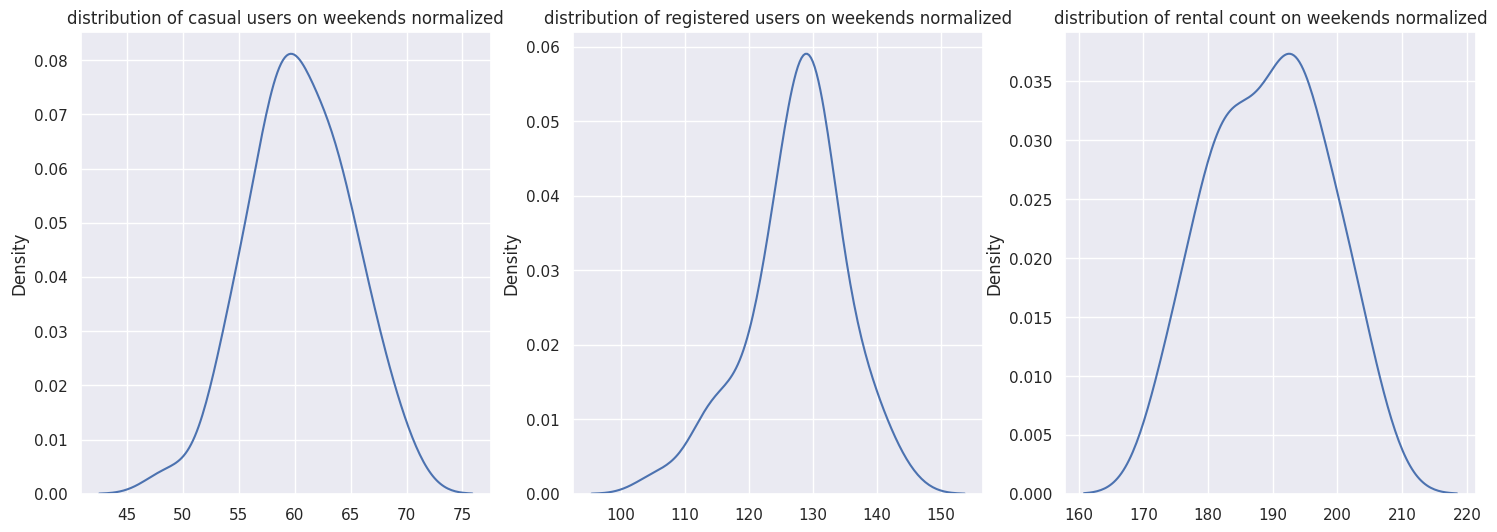

In [ ]:
#  distribution of casual, registered and total rentals on non holiday normalized using CLT(Central Limit Theorem)
fig = plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
plt.title("distribution of casual users on weekends normalized")
func1(df_weekends, "casual")
print()

plt.subplot(1,3,2)
plt.title("distribution of registered users on weekends normalized")
func1(df_weekends, "registered")
print()

plt.subplot(1,3,3)
plt.title("distribution of rental count on weekends normalized")
func1(df_weekends, "count")

In [ ]:
#Hypothesis Testing

In [ ]:
def hypothesis_test(p_value, alpha):
  if p_value < alpha:
    print("Reject Null Hypothesis")
  else:
    print("Fail to reject Null hypothesis")

# Statistical Analysis - T Test

In [ ]:
from scipy.stats import ttest_ind

The mean rentals on working and non working days
workingday_indicator
N    188.506621
Y    193.011873
Name: count, dtype: float64


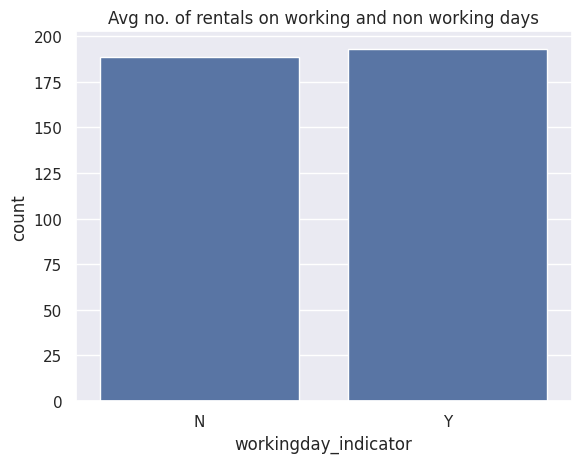

In [ ]:
#2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

'''
Null Hypothesis -> Average no. of rentals on working day = Average no. of rentals on non working day
Alternate hypothesis -> Average no. of rentals on working day <> Average no. of rentals on non working day
significance value = 0.05(standard value)
'''
print("The mean rentals on working and non working days")
print(df.groupby("workingday_indicator")["count"].mean())

plt.title("Avg no. of rentals on working and non working days")
sns.barplot(data = df.groupby("workingday_indicator")["count"].mean())
plt.show()

#series of rentals on workingday and non workingday
workingday_rentals = df.loc[df["workingday_indicator"]=="Y"]["count"]
nonworkingday_rentals = df.loc[df["workingday_indicator"]=="N"]["count"]

In [ ]:
#test1 (taking 25 random samples from each series)
sample_1_workingday = workingday_rentals.sample(25)
sample_2_workingday = nonworkingday_rentals.sample(25)
t_stat, p_value = ttest_ind(sample_1_workingday,sample_2_workingday )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:-1.080709580279771, p_value:0.28522641748100813
Fail to reject Null hypothesis


In [ ]:
#test2 (taking 200 random samples from each series)
sample_1_workingday = workingday_rentals.sample(200)
sample_2_workingday = nonworkingday_rentals.sample(200)
t_stat, p_value = ttest_ind(sample_1_workingday,sample_2_workingday )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:1.1163655968344415, p_value:0.26493919532755805
Fail to reject Null hypothesis


In [ ]:
#test3 (taking the entire series into consideration)
t_stat, p_value = ttest_ind(workingday_rentals,nonworkingday_rentals )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:1.2096277376026694, p_value:0.22644804226361348
Fail to reject Null hypothesis


* As p_value is greater than the set significance level, our statistical test states that there is no significant difference between average no. of rentals on working and non working days

* With a 5% significance level,we can state that working day or not, it doesn't effect the no. of cycles rented

The mean casual users on holiday and non holiday
holiday_indicator
N    35.646714
Y    48.781350
Name: casual, dtype: float64


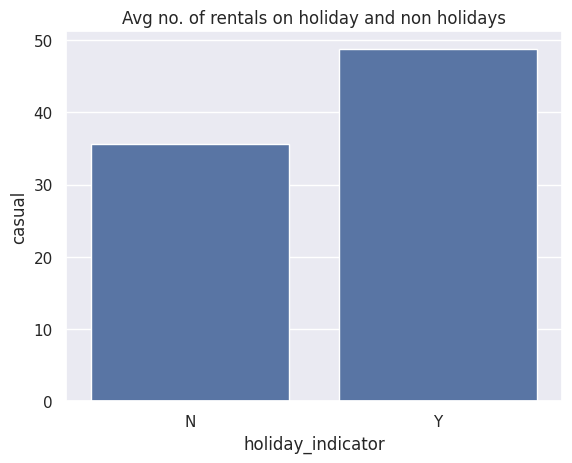

In [ ]:
#2- Sample T-Test to check if holiday has an effect on the number of casual users renting cycles

'''
Null Hypothesis -> Average no. of casual users on holiday = Average no. of casual users on non holiday
Alternate hypothesis -> Average no. of casual users on holiday > Average no. of casual users on non holiday
significance value = 0.05(standard value)
'''

print("The mean casual users on holiday and non holiday")
print(df.groupby("holiday_indicator")["casual"].mean())

plt.title("Avg no. of rentals on holiday and non holidays")
sns.barplot(data = df.groupby("holiday_indicator")["casual"].mean())
plt.show()

In [ ]:
#series of casual users on holiday and non holiday
holiday_casualusers = df.loc[df["holiday_indicator"]=="Y"]["casual"]
nonholiday_casualusers = df.loc[df["holiday_indicator"]=="N"]["casual"]

In [ ]:
#test1 (taking 25 random samples from each series)
sample_1_casual_holidays = holiday_casualusers.sample(25)
sample_1_casual_nonholiday = nonholiday_casualusers.sample(25)
t_stat, p_value = ttest_ind(sample_1_casual_holidays,sample_1_casual_nonholiday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:0.12050489163766154, p_value:0.45229310861492744
Fail to reject Null hypothesis


In [ ]:
#test2 (taking 100 random samples from each series)
sample_2_casual_holidays = holiday_casualusers.sample(100)
sample_2_casual_nonholiday = nonholiday_casualusers.sample(100)
t_stat, p_value = ttest_ind(sample_2_casual_holidays,sample_2_casual_nonholiday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:1.146755857109164, p_value:0.1264332106826388
Fail to reject Null hypothesis


In [ ]:
#test2
sample_3_casual_holidays = holiday_casualusers
sample_3_casual_nonholiday = nonholiday_casualusers
t_stat, p_value = ttest_ind(sample_3_casual_holidays,sample_3_casual_nonholiday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:4.573774174629942, p_value:2.421530012047593e-06
Reject Null Hypothesis


* As p_value is smaller than the set significance level, our statistical test states that there is casual users renting cycles on a holiday is significantly greater than on non holidays

* With a 5% significance level,we can state that rentals of casual users on holidays is greater than on non holidays

In [ ]:
#2- Sample T-Test to check if working day has an effect on the number of registered users renting cycles

'''
Null Hypothesis -> Average no. of registered on workingday = Average no. of registered users on nonworkingday
Alternate hypothesis -> Average no. of registered users on working day > Average no. of registered users on non working day
significance value = 0.05(standard value)
'''

'\nNull Hypothesis -> Average no. of registered on workingday = Average no. of registered users on nonworkingday\nAlternate hypothesis -> Average no. of registered users on working day > Average no. of registered users on non working day\nsignificance value = 0.05(standard value)\n'

The mean registered users on working and non workingday
workingday_indicator
N    129.198330
Y    167.904209
Name: registered, dtype: float64


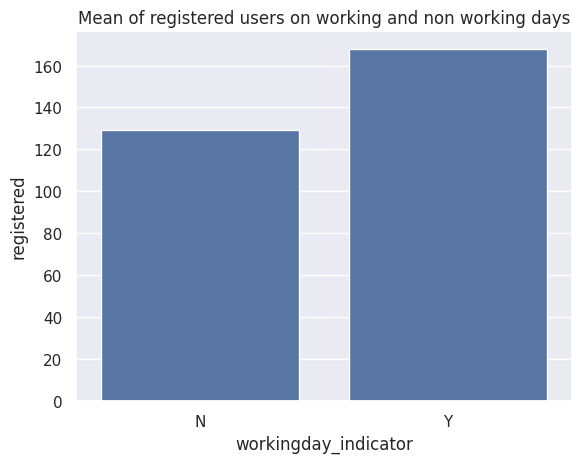

In [ ]:
print("The mean registered users on working and non workingday")
print(df.groupby("workingday_indicator")["registered"].mean())
plt.title("Mean of registered users on working and non working days")
sns.barplot(data =df.groupby("workingday_indicator")["registered"].mean() )
plt.show()

In [ ]:
#series of casual users on holiday and non holiday
workingday_registeredusers = df.loc[df["workingday_indicator"]=="Y"]["registered"]
nonworkingday_registeredusers = df.loc[df["workingday_indicator"]=="N"]["registered"]

In [ ]:
#test1
sample_1_workingday = workingday_registeredusers.sample(25)
sample_1_nonworkingday = nonworkingday_registeredusers.sample(25)
t_stat, p_value = ttest_ind(sample_1_workingday,sample_1_nonworkingday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:1.8007321679053576, p_value:0.039014889472392095
Reject Null Hypothesis


In [ ]:
#test2
sample_2_workingday = workingday_registeredusers.sample(250)
sample_2_nonworkingday = nonworkingday_registeredusers.sample(250)
t_stat, p_value = ttest_ind(sample_2_workingday,sample_2_nonworkingday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:3.2224202484490663, p_value:0.0006771842623572893
Reject Null Hypothesis


In [ ]:
#test3
sample_3_workingday = workingday_registeredusers
sample_3_nonworkingday = nonworkingday_registeredusers
t_stat, p_value = ttest_ind(sample_3_workingday,sample_3_nonworkingday, alternative = "greater" )
print(f"t_stat:{t_stat}, p_value:{p_value}")
hypothesis_test(p_value, 0.05)

t_stat:12.552707000266874, p_value:3.403246859958037e-36
Reject Null Hypothesis


* As p_value is smaller than the set significance level, our statistical test states that there is registered users renting cycles on a workingday is significantly greater than on non workingdays

* With a 5% significance level,we can state that rentals of registered users on workingdays is greater than on non workingdays

#Statistical Analysis - Chisquared test

In [ ]:
'''
Chi-square test to check if Weather is dependent on the season
'''

'\nChi-square test to check if Weather is dependent on the season\n'

In [ ]:
df[["season_name", "weather_condition"]].head(2)

,season_name,weather_condition
0,spring,clear
1,spring,clear


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
'''
Null Hypothesis -> there is no significant association between season and weather condition
Alternate hypothesis -> there is significant association between season and weather condition

significance level = 0.05
'''

'\nNull Hypothesis -> there is no significant association between season and weather condition\nAlternate hypothesis -> there is significant association between season and weather condition\n\nsignificance level = 0.05\n'

In [ ]:
#creating a contingency table using crossstab between season and weather
season_weather = pd.crosstab(df["season_name"], df["weather_condition"])
season_weather

weather_condition,Foggy,clear,heavy drizzle,light drizzle
season_name,,,,
fall,604,1930,0,199
spring,715,1759,1,211
summer,708,1801,0,224
winter,807,1702,0,225


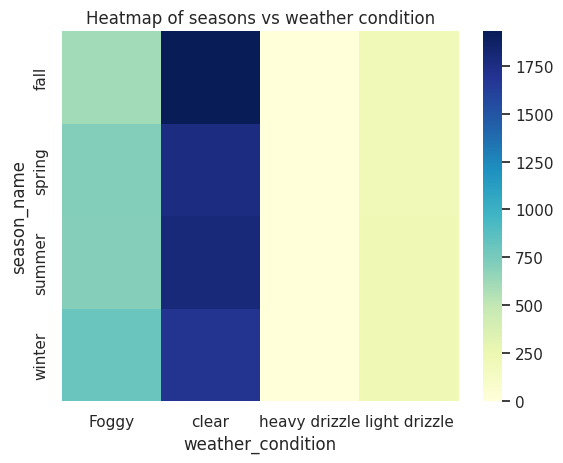

In [ ]:
plt.title("Heatmap of seasons vs weather condition")
sns.heatmap(season_weather, cmap='YlGnBu')
plt.show()

In [ ]:
#performing a chisquared independent test
chi_stat, p_value, DoF, exp_freq = chi2_contingency(season_weather)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("DoF:",DoF)
print("exp_freq:",exp_freq)
print()
hypothesis_test(p_value, 0.05)

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
DoF: 9
exp_freq: [[7.11493845e+02 1.80559765e+03 2.51056403e-01 2.15657450e+02]
 [6.99258130e+02 1.77454639e+03 2.46738931e-01 2.11948742e+02]
 [7.11493845e+02 1.80559765e+03 2.51056403e-01 2.15657450e+02]
 [7.11754180e+02 1.80625831e+03 2.51148264e-01 2.15736359e+02]]

Reject Null Hypothesis


* As p_value << alpha (significance level = 0.05)
* It can be stated that there is significant association between season and weather condition

#Statistical Analysis - Annova

In [ ]:
'''
ANNOVA to check if No. of cycles rented is similar or different in different
1. weather
2. season
'''

'\nANNOVA to check if No. of cycles rented is similar or different in different \n1. weather \n2. season\n'

In [ ]:
# Annova to check if no. of cycles rented is similar or different in different seasons

In [ ]:
# H0: All seasons have the same mean
# Ha: One or more seasons have different mean

In [ ]:
df.groupby("season_name")["count"].mean()

season_name
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

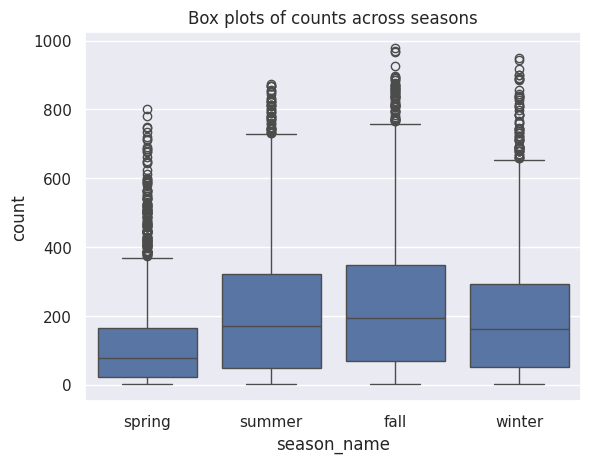

In [ ]:
plt.title("Box plots of counts across seasons")
sns.boxplot(data = df, x = "season_name", y = "count")
plt.show()

In [ ]:
df_fall = df.loc[df["season_name"]=="fall"]["count"]
df_spring = df.loc[df["season_name"]=="spring"]["count"]
df_summer = df.loc[df["season_name"]=="summer"]["count"]
df_winter = df.loc[df["season_name"]=="winter"]["count"]

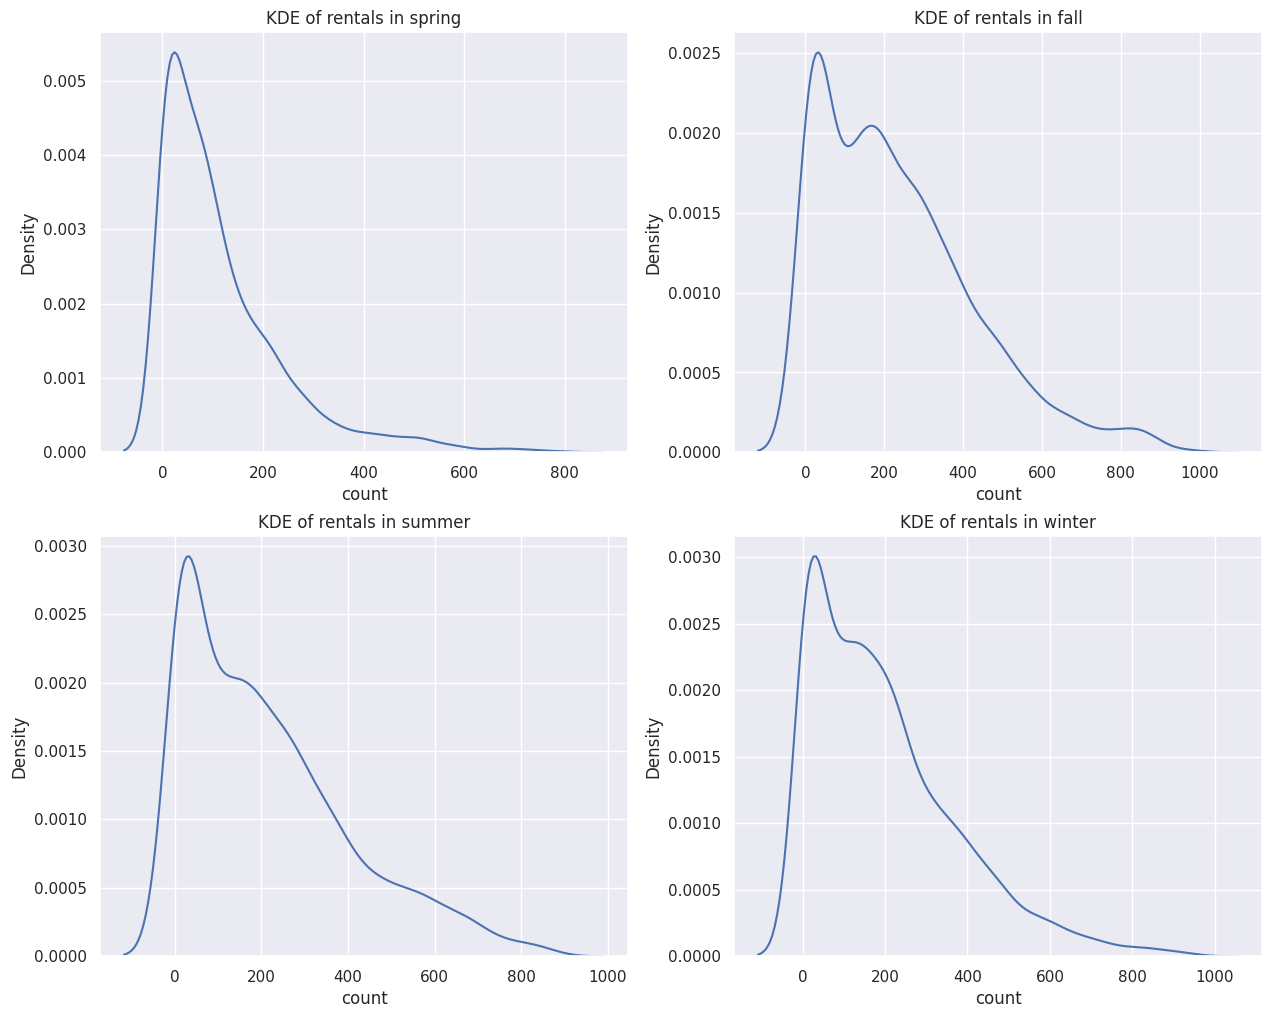

In [ ]:
#plotting probability distribution of rental count across seasons
fig = plt.figure(figsize = [15,12])

plt.subplot(2,2,1)
plt.title("KDE of rentals in spring")
sns.kdeplot(df_spring)

plt.subplot(2,2,2)
plt.title("KDE of rentals in fall")
sns.kdeplot(df_fall)

plt.subplot(2,2,3)
plt.title("KDE of rentals in summer")
sns.kdeplot(df_summer)

plt.subplot(2,2,4)
plt.title("KDE of rentals in winter")
sns.kdeplot(df_winter)

plt.show()

In [ ]:
#The data is not normally distributed

In [ ]:
from scipy.stats import f_oneway, kruskal # Numeric Vs categorical for many categories

In [ ]:
# one_way Annova test can be performed, opting for Kruskal wallis test

In [ ]:
stat, p_value = kruskal(df_fall, df_spring, df_summer,df_winter )

print("test statistic:",stat)
print("p_value:",p_value)
print()
hypothesis_test(p_value, 0.05)

test statistic: 699.6668548181988
p_value: 2.479008372608633e-151

Reject Null Hypothesis


* As p_value < significance level(alpha = 0.05)
* we reject H0 and it can be stated that atleast one seasons has different mean rental count

In [ ]:
# Annova to check if no. of cycles rented is similar or different in different weather conditions

In [ ]:
# H0: All weather conditions have the same rental count mean
# Ha: Atleast one weather has a different rental count mean

In [ ]:
df.groupby("weather_condition")["count"].mean()

weather_condition
Foggy            178.955540
clear            205.236791
heavy drizzle    164.000000
light drizzle    118.846333
Name: count, dtype: float64

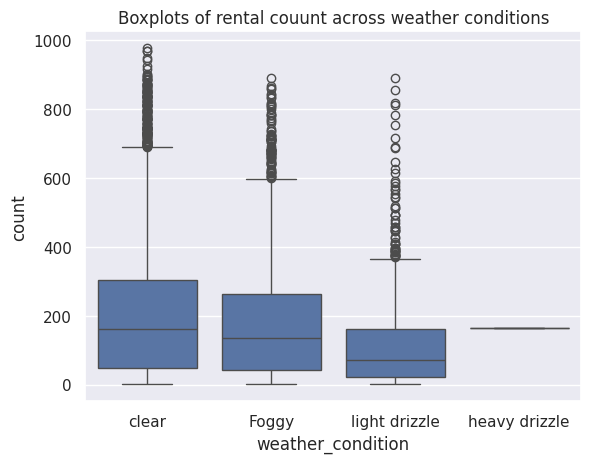

In [ ]:
plt.title("Boxplots of rental couunt across weather conditions")
sns.boxplot(data = df, x = "weather_condition", y = "count")
plt.show()

In [ ]:
df_clear = df.loc[df["weather_condition"]== "clear"]["count"]
df_foggy = df.loc[df["weather_condition"]== "Foggy"]["count"]
df_lightdrizzle = df.loc[df["weather_condition"]== "light drizzle"]["count"]
df_heavydrizzle = df.loc[df["weather_condition"]== "heavy drizzle"]["count"]

<ipython-input-262-015baa0626d7>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_heavydrizzle)


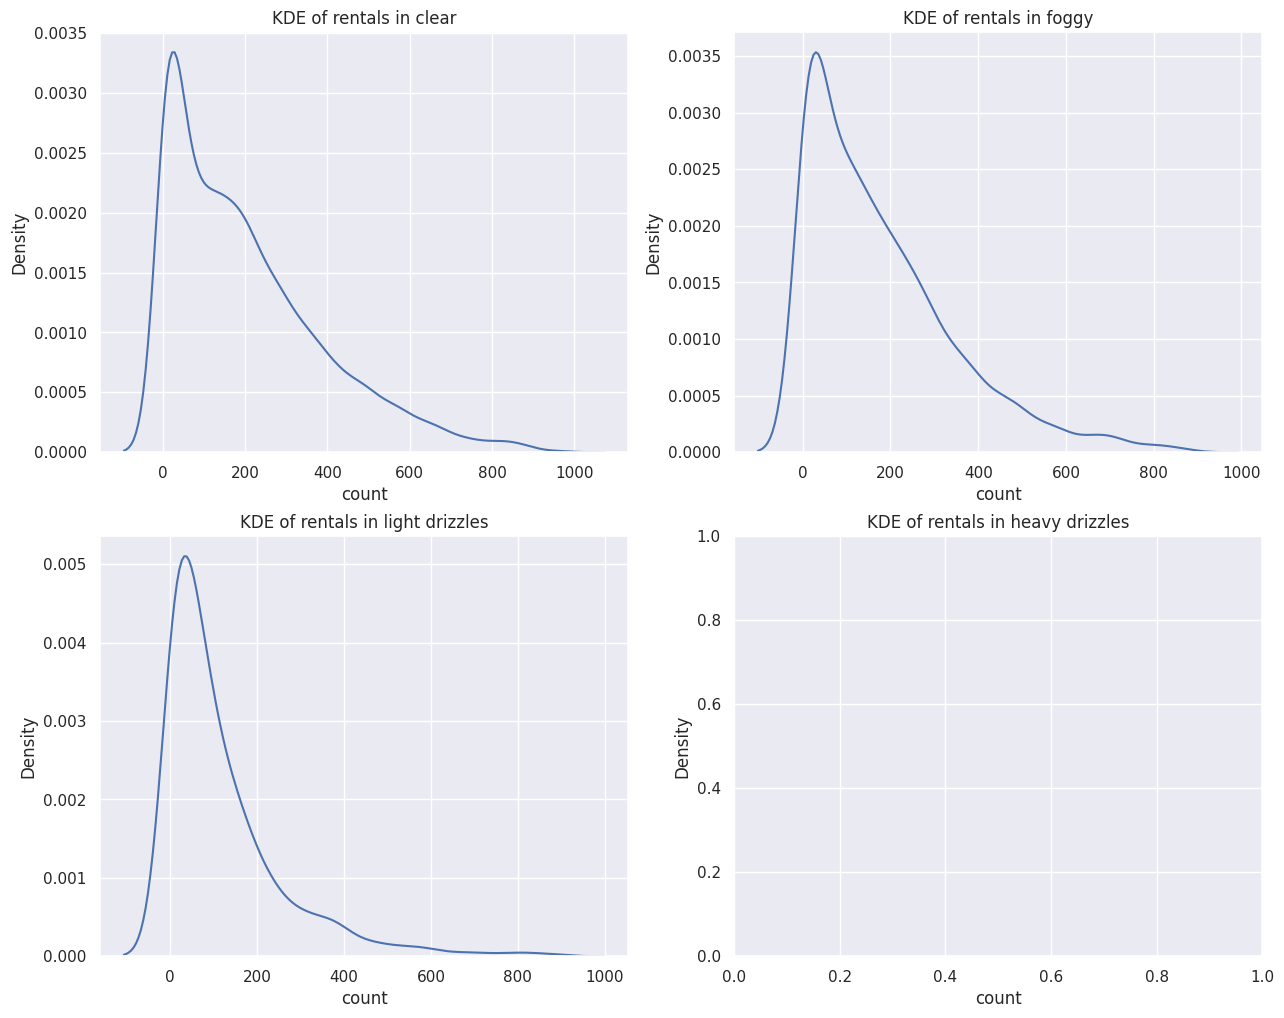

In [ ]:
#plotting probability distribution of rental count across weather conditions
fig = plt.figure(figsize = [15,12])

plt.subplot(2,2,1)
plt.title("KDE of rentals in clear")
sns.kdeplot(df_clear)

plt.subplot(2,2,2)
plt.title("KDE of rentals in foggy")
sns.kdeplot(df_foggy)

plt.subplot(2,2,3)
plt.title("KDE of rentals in light drizzles")
sns.kdeplot(df_lightdrizzle)

plt.subplot(2,2,4)
plt.title("KDE of rentals in heavy drizzles")
sns.kdeplot(df_heavydrizzle)

plt.show()

In [ ]:
#This data is also not normally distributed

In [ ]:
#Using Kruskal Wallis test to check the hypothesis

In [ ]:
stat,p_value = kruskal(df_clear,df_foggy, df_lightdrizzle,  df_heavydrizzle)
print("test statistic:",stat)
print("p_value:",p_value)
print()
hypothesis_test(p_value, 0.05)

test statistic: 205.00216514479087
p_value: 3.501611300708679e-44

Reject Null Hypothesis


* As p_value < significance level(alpha = 0.05)
* we rejust H0 and it can be stated that atleast one weather condition has different mean rental count

#Insights from Seasonal Analysis:

* Fall, summer, and winter witnessed high demand for shared electric cycles.
Holidays in fall and winter saw slightly greater rentals than non-holidays.
Only in summer did the number of rentals on non-working days exceed working days.
* Clear and foggy weather conditions were associated with high total rentals.
* Clear days were the most popular for rentals, regardless of being a working day or holiday.
* Summer, fall, and winter were the preferred months among rental users.

#User Segmentation Analysis:

* Casual users had a mean of 36.31 with a standard deviation of 3.8, while 90% fell between 30.07 and 42.56.
* Registered users had a mean of 154.52 with a standard deviation of 9.55, and 90% fell between 138.81 and 170.23.
* Total rentals had a mean of 191.15 with a standard deviation of 12.96, and 90% fell between 169.84 and 212.46.
* The distribution of casual, registered, and total rentals on working and non-working days normalized using the Central Limit Theorem was presented.

#Statistical Tests:

* A t-test indicated no significant difference in average rentals on working and non-working days.
* Casual users rented significantly more cycles on holidays than on non-holidays.
* Registered users rented significantly more cycles on working days than on non-working days.

# Chi-Square and ANOVA Tests:

* The Chi-Square test revealed a significant association between season and weather conditions.
* ANOVA tests suggested that the number of cycles rented varied significantly across different seasons and weather conditions.

#Conclusion:

Seasonal Marketing Strategies:
* Leverage the peak demand observed in fall, summer, and winter by implementing targeted marketing campaigns during these seasons.
* Offer seasonal promotions, discounts, or special events to attract more users during high-demand periods.

Holiday-focused Campaigns:
* Recognize the increased demand during holidays, especially in fall and winter, by launching holiday-specific promotions or events to incentivize more rentals.

Weather-Responsive Services:
* Capitalize on the popularity of clear and foggy weather conditions by providing incentives for users to rent during these weather conditions.
* Consider implementing dynamic pricing or weather-specific promotions to encourage usage during less favorable weather.

Working Day and Non-Working Day Strategies:
* Recognize the distinction in user behavior on working and non-working days.
* Implement targeted marketing on working days to appeal to registered users and on holidays for casual users.
* Tailor promotions, discounts, or events based on the day of the week to align with user preferences.

User Segmentation Strategies:
* Recognize the differences in user behavior between casual and registered users.
* Develop personalized marketing strategies for each segment, such as loyalty programs for registered users and occasional promotions for casual users.

Operational Adjustments:
* Optimize fleet management based on seasonal and weather-specific demand patterns.
* Consider redistributing electric cycles to high-demand locations during peak seasons or inclement weather.
